## Task 4 - Clustering

Use PCA to reduce the dimensionality of the data to 2. You should use the dataset obtained after pre-processing and transformation from Task 3.1 without feature selection. Write a Python program to visualize the results of clustering the PCA-reduced dataset.

Markdown Question: How do you think the visualization will change if you used 3 PCA components?

<span style="font-weight:bold;">Save your response (program and markdown) as task4.ipynb.</span>

## <b style="color: blue;">A visualization should have a goal/question/hypothesis. Clarify this!</b>

In [6]:
import matplotlib.pyplot as plt 
from ipynb.fs.full.functions import (
    load_model, plot_class_split_of_values, reduce_pca_dimensionality,
    svc_classifier, 
)
from sklearn.cluster import KMeans

(16200, 512)
(5400, 512)
(16200,)
(5400,)


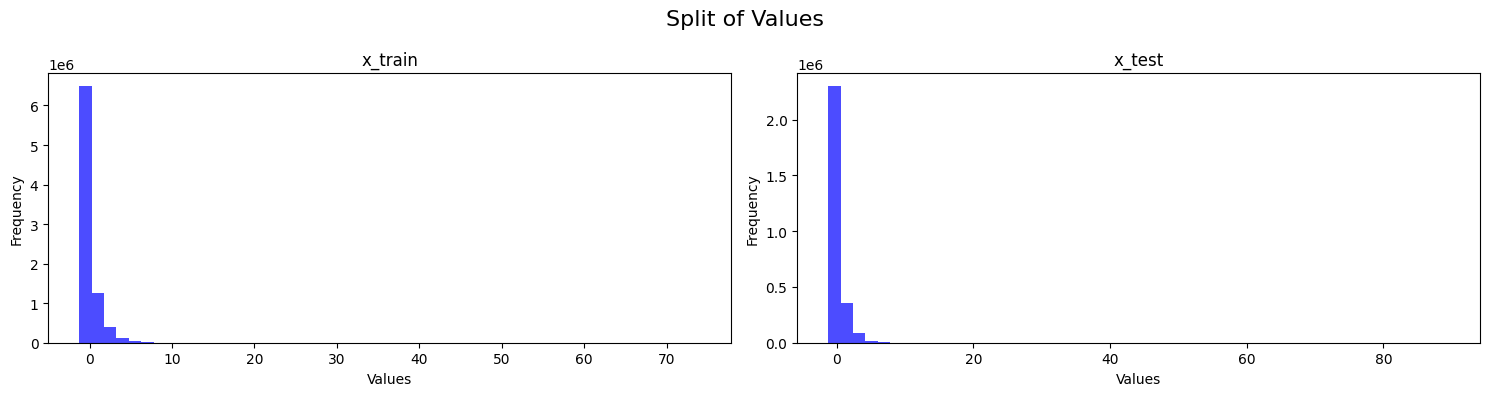

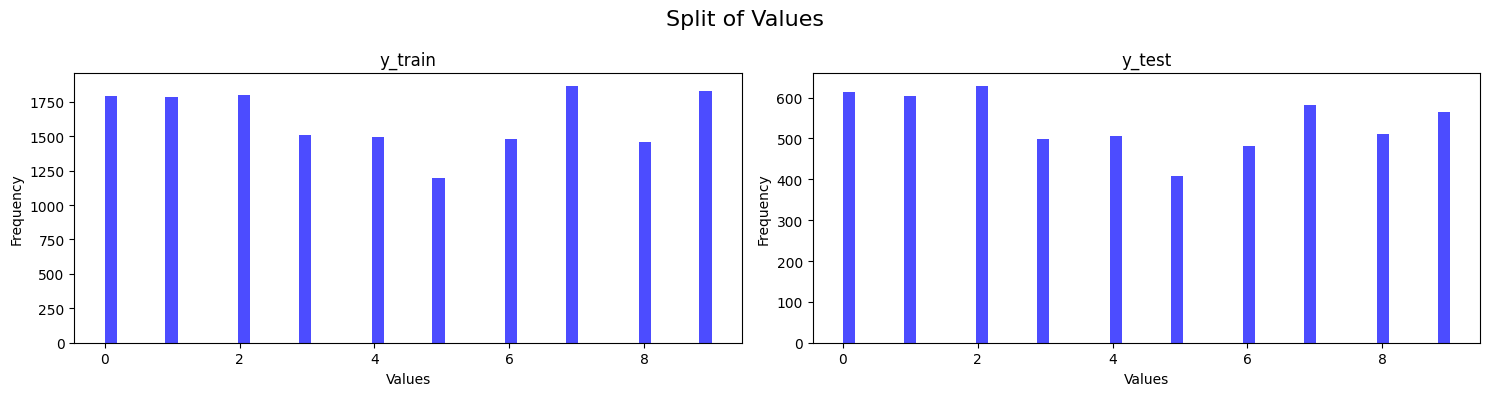

In [7]:
x_train_norm = load_model("datasets/saved_datasets/task1/x_train")
x_test_norm = load_model("datasets/saved_datasets/task1/x_test")
y_train_norm = load_model("datasets/saved_datasets/task1/y_train")
y_test_norm = load_model("datasets/saved_datasets/task1/y_test")

print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

plot_class_split_of_values([x_train_norm, x_test_norm], ["x_train", "x_test"])
plot_class_split_of_values([y_train_norm, y_test_norm], ["y_train", "y_test"])

----
## Dimensionality Reduction 

It is used to reduce the amount of features
PCA is a dimensionality reduction technique (reducing data whilst keeping as much info as possible - mainly removes cols). 

How does dimensionality reduction differ from feature selection? -> Feature selection fetches only the most relevant variables whereas in dimensionality reduction, a smaller set of new variables are taken, each being a combination of the input variables, containing basically the same information as the input variables 

<span style="color:red">
Things to do <h3>Check other dimensionality reduction methods</h3>

- PCA - Built to compress the data but will lose a lot in interoperability
</span>


In [8]:
x_train_pca, x_test_pca = reduce_pca_dimensionality(x_train_norm, x_test_norm, 2)
print(x_train_pca.shape)
print(x_test_pca.shape)

(16200, 2)
(5400, 2)


In [5]:
svc_results = svc_classifier(x_train_pca, x_test_pca, y_train_norm, y_test_norm)

KeyboardInterrupt: 

----
## Clustering

In [9]:
km = KMeans(n_clusters=3, random_state=42)
clusters = km.fit_predict(x_train_pca)

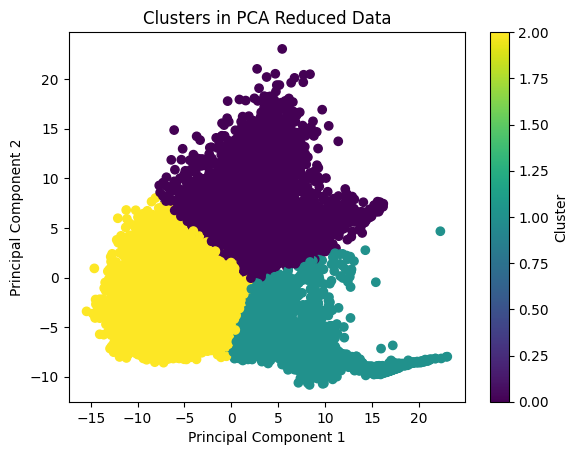

In [10]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters in PCA Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

#### Finding the best K value

- 1st find the centroids -> elbow method with Sum of Squared Error (for each centroid in a cluster, calculate SSE and then add) -> plot line graph

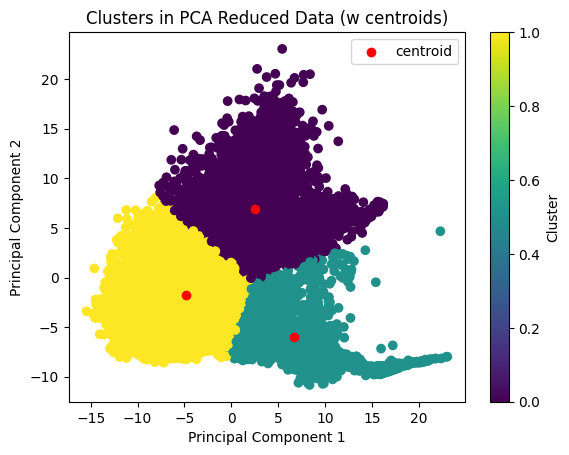

In [11]:

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="red", marker="o", label='centroid')
plt.title('Clusters in PCA Reduced Data (w centroids)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [12]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_train_pca)
    sse.append(km.inertia_)

print(sse)

[1167577.1992376924, 759441.134430598, 411525.32374302787, 307908.6237431328, 239934.64637984673, 201160.03679379885, 182396.4857608115, 153228.58398846857, 132193.1691908834]


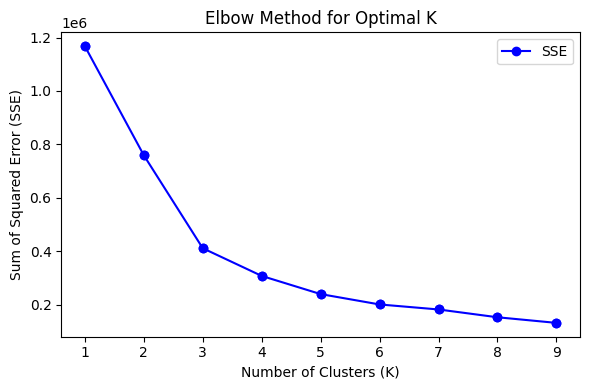

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b', label='SSE')
plt.scatter(k_range, sse, color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.xticks(k_range)
plt.legend()
plt.tight_layout()
plt.show()

It can be seen K=3 is the ideal value ......

----
## Evaluation <b style="color: blue;">Define metric used for evaluation</b>

In [1]:
## Use clustering metrics from sklearn

----
<span style="font-weight:bold;">Markdown Question: How do you think the visualization will change if you used 3 PCA components?

This is the answer